In [5]:
from machine_harmony import get_new_model
from torchview import draw_graph
from model import *
import torch
import numpy as np

Code used for generating some of the figures in the dissertation report

In [16]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

depth = 1


Using CPU


In [20]:
p = {
    "bidirectional": False,
    "attention_model": None,
    "SOS_TOKEN": 129,
    "output_num": 6,
    "dropout": 0.2,
    "lr": 0.05,
    "hidden_size":256,
    "batch_size": 512,
    "normalisation":"both",
    "input": 231,
    
}
token_path = "artifacts/{}_tokens.pkl".format(230)

# d = DecoderRNN(p["hidden_size"], 231, p["attention_model"],device,p["SOS_TOKEN"], p["normalisation"] )
# model = EncoderDecoder(e, d)
e = EncoderRNN(p["input"], p["hidden_size"],  p["bidirectional"], p["normalisation"])

model_graph = draw_graph(e, input_size=(p["batch_size"],p["input"] ), device=device, dtypes= [torch.long], depth=depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"

model_graph.visual_graph
model_graph.visual_graph.render(filename="encoder",format='png')
# produces output + hidden layer (consists of hidden layer + cell layer)

'encoder.png'

In [12]:
p["normalisation"] ="dropout"
p["attention_model"] = None
d = DecoderRNN(p["hidden_size"], 231, p["attention_model"],device,p["SOS_TOKEN"], p["normalisation"] )

# o = torch.Size([p["batch_size"], p["input"], p["hidden_size"] ])
# h = torch.Size([1, p["batch_size"], p["hidden_size"]])

o = torch.randn([p["batch_size"], p["input"], p["hidden_size"] ])
h = torch.randn([1, p["batch_size"], p["hidden_size"]])

model_graph = draw_graph(d, input_data=(o, (h, h)), device=device, dtypes= [torch.long], depth = depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"

model_graph.visual_graph
model_graph.visual_graph.render(format='png')

'model.gv.png'

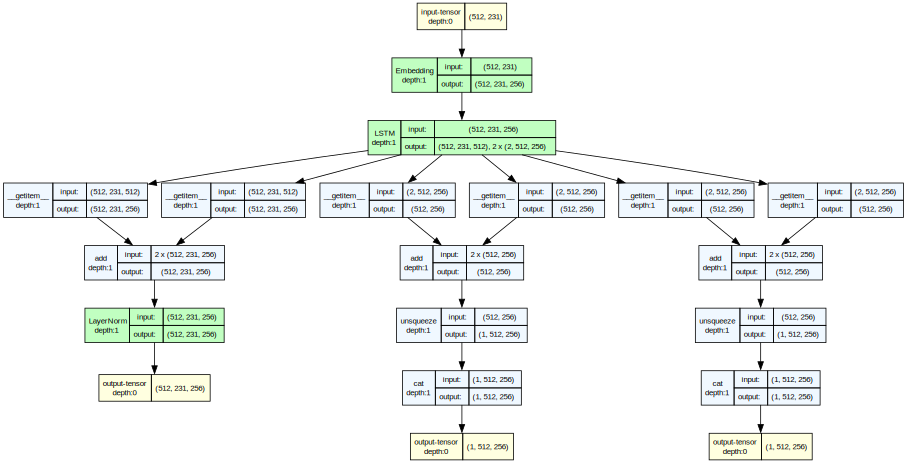

In [59]:
#bidirectional encoder w layernorm now

p["bidirectional"] = True
p["normalisation"] = "layer"

e = EncoderRNN(p["input"], p["hidden_size"],  p["bidirectional"], p["normalisation"])

model_graph = draw_graph(e, input_size=(p["batch_size"],p["input"] ), device=device, dtypes= [torch.long], depth = depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"

model_graph.visual_graph

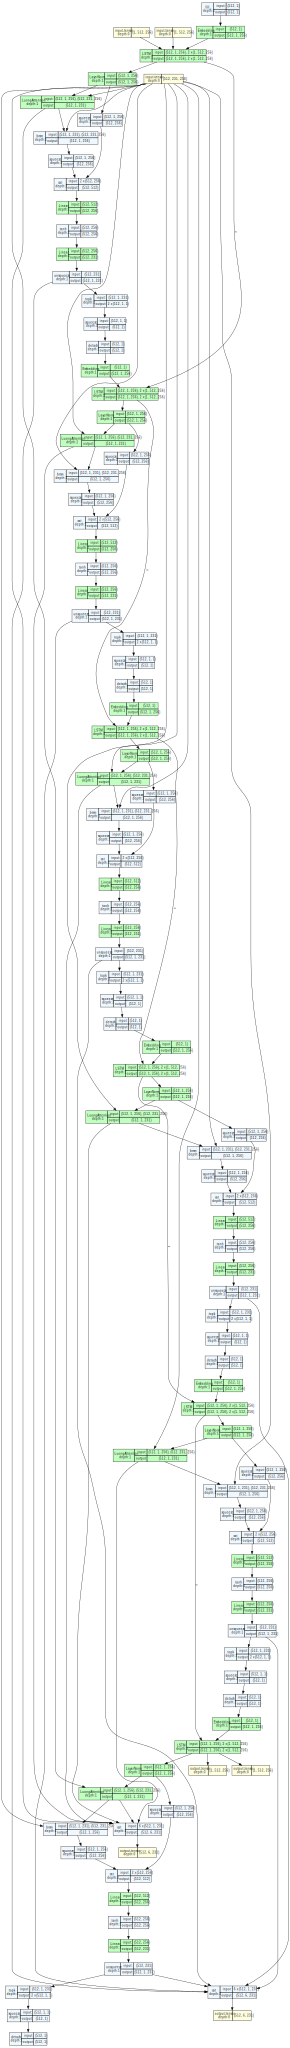

In [60]:
p["normalisation"] = "layer"
p["attention_model"] = "luong"

d = DecoderRNN(p["hidden_size"], 231, p["attention_model"],device,p["SOS_TOKEN"], p["normalisation"] )

# o = torch.Size([p["batch_size"], p["input"], p["hidden_size"] ])
# h = torch.Size([1, p["batch_size"], p["hidden_size"]])

o = torch.randn([p["batch_size"], p["input"], p["hidden_size"] ])
h = torch.randn([1, p["batch_size"], p["hidden_size"]])

model_graph = draw_graph(d, input_data=(o, (h, h)), device=device, dtypes= [torch.long], expand_nested="True", depth=depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph

In [14]:
# bahdanau and luong attention graphs
# can be more in depth bc they're small-ish

depth = 2
luong = LuongAttention(p["hidden_size"])

d_i = torch.randn(p["batch_size"], 1, p["hidden_size"])
e_i = torch.randn(p["batch_size"], 3, p["hidden_size"])

model_graph = draw_graph(luong, input_data=(d_i, e_i), device=device, dtypes= [torch.long], depth=depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph
model_graph.visual_graph.render(filename = "luong",format="png")


'luong.png'

In [15]:
depth = 2
bahdanau = BahdanauAttention(p["hidden_size"])

q_i = torch.randn(p["batch_size"], 1, p["hidden_size"])
# outputs always 3 bc encoder outputs were 3
k_i = torch.randn(p["batch_size"], 3, p["hidden_size"])
model_graph = draw_graph(bahdanau, input_data=(q_i, k_i), device=device, dtypes= [torch.long], depth=depth)
model_graph.visual_graph.node_attr["fontname"] = "Helvetica"
model_graph.visual_graph
model_graph.visual_graph.render(filename = "bahdanau",format="png")


'bahdanau.png'

In [1]:
from eval import FB_frequency_count

results = FB_frequency_count("artifacts/preprocessed_all.pt", "artifacts/tokens_all.pkl" )
freqs = results["frequencies"]

for item, freq in freqs.most_common(25):
    print("{}: {}".format(item, freq))

print(freqs.most_common(25))

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts/preprocessed.pt'

In [20]:
from matplotlib import pyplot as plt, ticker



tensor([ 73.,  42., 130.])
tensor([ 69.,  66.,  54.,  71.,  41., 135.])


c:\Users\Corvi\Documents\uni\work\y5\diss\harmony-generation\postprocessing.py:281: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + [int(i.item()) for i in input] + [''])
c:\Users\Corvi\Documents\uni\work\y5\diss\harmony-generation\postprocessing.py:282: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + [int(i.item()) for i in labels] + [''])#


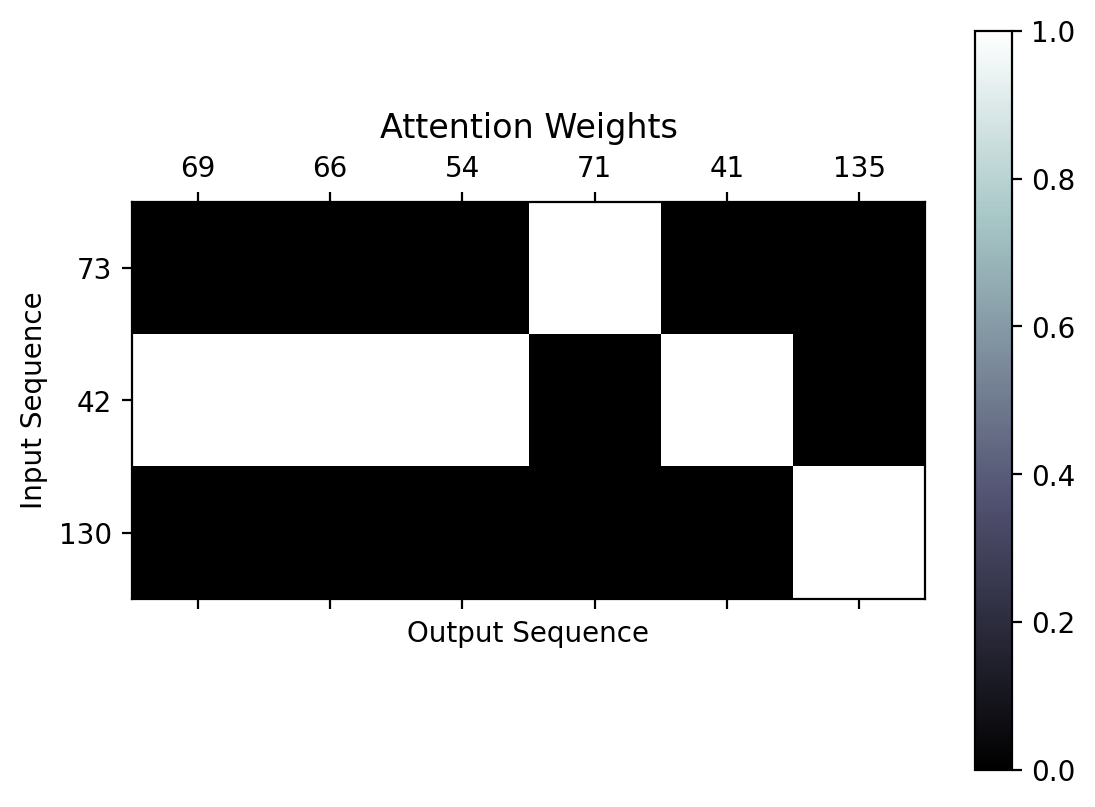

In [48]:
import torch
import numpy as np
from postprocessing import plot_attention


def get_attention_info(batch_num, i, prefix, score):
    eval = torch.load("temp/{}-BWV_{}_FB.musicxml.pt".format(prefix, score))
    attentions = eval["attentions"]
    weights = attentions["weights"]
    x = attentions["x"]
    y = attentions["y"]
    single_x = x[batch_num][i]
    single_y = y[batch_num][i]

    attention = weights[batch_num][i]
    # np.transpose(attention)
    # print(attention)
    print(single_x)
    print(single_y)
    plot_attention(attention,single_x, single_y)


# difference between b and u: batch 5, i 6, 36.08
    # 6, 7, 145.05

batch_num = 0
# shouldn't matter too much - since batch num = resolution, each batch is a crotchet's worth of timesteps
i = 7
prefix = "b"
score = "245.14"

get_attention_info(batch_num, i, prefix, score)


In [4]:
#analysis for hypothesis testing

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# alternative = larger or two-sided
def hypothesis_test(success, total, alternative, null_proportion = 0.5, alpha = 0.05):
    z_stat, p_value = proportions_ztest(success, total, value=null_proportion, alternative=alternative)

    print("Z-score: {}".format(z_stat))
    print("P value: {}".format(p_value))

    if p_value<alpha:
        print("Reject null hypothesis. Majority (i.e. >50%) preference, or there is a preference towards a sample (if two sided).")
    else:
        print("Fail to reject null hypothesis. No majority preference, or there is not a preference towards a sample (if two sided).")

In [10]:
hypothesis_test(38, 47, "larger")
hypothesis_test(37, 47, "larger")
hypothesis_test(23, 41, "larger")
hypothesis_test(24, 41, "larger")

# two sided bc greatest result was "sound the same"
hypothesis_test(20, 33, "two-sided")
hypothesis_test(22, 33, "larger")




Z-score: 5.375314488283751
P value: 3.822456389082431e-08
Reject null hypothesis. Majority (i.e. >50%) preference, or there is a preference towards a sample (if two sided).
Z-score: 4.811514904442849
P value: 7.489528088114413e-07
Reject null hypothesis. Majority (i.e. >50%) preference, or there is a preference towards a sample (if two sided).
Z-score: 0.786740969224945
P value: 0.21571675790620443
Fail to reject null hypothesis. No majority preference, or there is not a preference towards a sample (if two sided).
Z-score: 1.1095066029369915
P value: 0.1336058487784249
Fail to reject null hypothesis. No majority preference, or there is not a preference towards a sample (if two sided).
Z-score: 1.2469192805902445
P value: 0.21242709636238222
Fail to reject null hypothesis. No majority preference, or there is not a preference towards a sample (if two sided).
Z-score: 2.0310096011589898
P value: 0.021127010327211152
Reject null hypothesis. Majority (i.e. >50%) preference, or there is a pr